# CHAPTER 6: DECISION MAKING WITH HYPOTHESIS TESTS
**(Week 11-12: Lecture Notes)**

---

## 1. INTRODUCTION: WHAT IS A HYPOTHESIS TEST? (The Court Analogy)
In statistics, when making decisions, we act with the logic of the **"Presumption of Innocence"**. To refute a claim, we must have **"sufficient evidence"**.

### 1.1. Two Rival Hypotheses
1.  **Null Hypothesis ($H_0$):**
    *   The claim defending the current situation, the status quo, or "no difference".
    *   *Court equivalent:* "The defendant is Innocent."
    *   *Production equivalent:* "Production is flawless, the average is exactly 10 cm."

2.  **Alternative Hypothesis ($H_1$ or $H_a$):**
    *   The claim the researcher (us) is trying to prove, defending "there is a difference".
    *   *Court equivalent:* "The defendant is Guilty."
    *   *Production equivalent:* "Production is faulty, the average is not 10 cm."

### 1.2. The Decision Mechanism
We collect data (evidence).
*   If the evidence is **very strong**, $H_0$ is **Rejected**. (Defendant is found guilty).
*   If the evidence is **weak**, $H_0$ **Cannot Be Rejected**. (Defendant is acquitted. *Note: We don't say "Innocent", we say "Guilt could not be proven"*).


## 2. TYPES OF ERRORS (Risk Management)
There is always a risk of making a mistake when making a decision. There can be two types of errors:

| | **Reality: $H_0$ is TRUE** (Product is good) | **Reality: $H_0$ is FALSE** (Product is bad) |
| :--- | :--- | :--- |
| **Decision: Accept $H_0$** | Correct Decision | **Type II Error ($\beta$)**<br>(Consumer Risk) |
| **Decision: Reject $H_0$** | **Type I Error ($\alpha$)**<br>(Producer Risk) | Correct Decision |

---

## 3. VISUALIZING THE DECISION RULE
We convert our data to a **Z-Score**. If this score falls into the "Critical Region" (Tail ends), we reject the Null Hypothesis.

### The Z-Test Logic
1.  **Calculate Z:** How many standard deviations away is the sample mean?
2.  **Compare:** If it is further than **1.96** (for 95% confidence), it's not luck. It's a real difference.


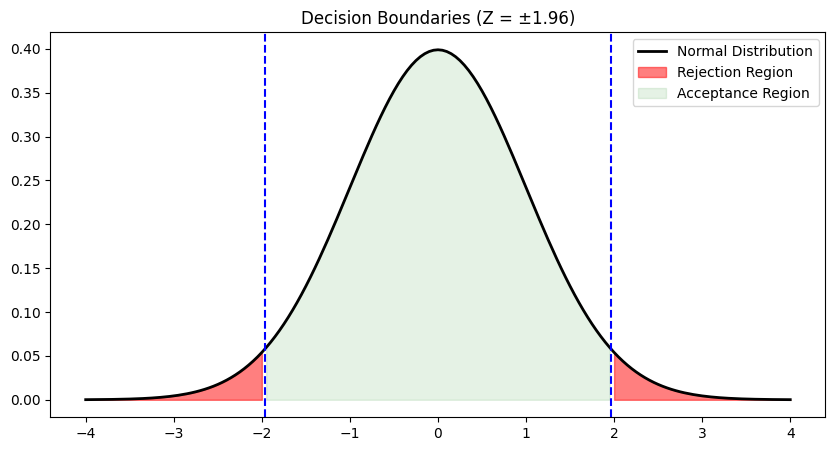

In [2]:
# Visualizing Critical Regions (Alpha = 0.05, Two-Tailed)
x_vals, y_vals = generate_normal_data(-4, 4, 0.05)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Normal Distribution')

# Color the Rejection Regions manually
# Region 1: Right Tail (Z > 1.96)
x_right = [x for x in x_vals if x > 1.96]
y_right = [y for x, y in zip(x_vals, y_vals) if x > 1.96]
plt.fill_between(x_right, y_right, color='red', alpha=0.5, label='Rejection Region')

# Region 2: Left Tail (Z < -1.96)
x_left = [x for x in x_vals if x < -1.96]
y_left = [y for x, y in zip(x_vals, y_vals) if x < -1.96]
plt.fill_between(x_left, y_left, color='red', alpha=0.5)

# Region 3: Acceptance Region
x_accept = [x for x in x_vals if -1.96 <= x <= 1.96]
y_accept = [y for x, y in zip(x_vals, y_vals) if -1.96 <= x <= 1.96]
plt.fill_between(x_accept, y_accept, color='green', alpha=0.1, label='Acceptance Region')

plt.axvline(1.96, color='blue', linestyle='--')
plt.axvline(-1.96, color='blue', linestyle='--')
plt.title("Decision Boundaries (Z = ±1.96)")
plt.legend()
plt.show()


## 4. SINGLE SAMPLE TESTS (Z and T Tests)

### Case 1: Population Standard Deviation ($\sigma$) Known (Z-Test)
**Numerical Example:**
A cable factory claims the breaking strength of cables is **1000 kg** ($\mu_0 = 1000$). Standard deviation $\sigma = 20$ kg.
We tested **n = 50** cables, mean came out **$\bar{x} = 992$ kg**.
**Is the factory's claim true?** (Test for $\alpha = 0.05$).

#### Solution Steps:
1.  **Hypotheses:**
    *   $H_0: \mu = 1000$
    *   $H_1: \mu \neq 1000$
2.  **Calculate Standard Error:**
    *   $SE = \frac{20}{\sqrt{50}} \approx 2.83$
3.  **Calculate Z-Score:**
    *   $Z = \frac{992 - 1000}{2.83} = \frac{-8}{2.83} \approx \mathbf{-2.82}$
4.  **Decision:**
    *   Critical Value (from table) = **1.96**
    *   Since $|-2.82| > 1.96$, we **REJECT** the claim.
    *   *Conclusion:* The cables are weaker than claimed.


In [3]:
# Z-Test Verification
mu_0 = 1000
sigma = 20
n = 50
x_bar = 992
z_critical = 1.96  # Fixed value for 95% confidence

std_error = sigma / math.sqrt(n)
z_calc = (x_bar - mu_0) / std_error

print(f"--- Cable Problem Results ---")
print(f"Standard Error: {std_error:.3f}")
print(f"Calculated Z  : {z_calc:.3f}")

if abs(z_calc) > z_critical:
    print("Result: REJECT H0 (The factory is lying!)")
else:
    print("Result: ACCEPT H0 (The factory might be right)")


--- Cable Problem Results ---
Standard Error: 2.828
Calculated Z  : -2.828
Result: REJECT H0 (The factory is lying!)


### Case 2: Population SD ($\sigma$) Unknown (T-Test)
*(When we only have sample $s$ and $n < 30$)*

**Numerical Example:**
New concrete additive. Target pressure **30 MPa**.
Sample **n = 9**, Mean **$\bar{x} = 31.5$**, Std Dev **s = 1.5**.
**Is there a difference?**

#### Solution Steps:
1.  **Calculate T-Score:**
    *   $SE = \frac{1.5}{\sqrt{9}} = 0.5$
    *   $T = \frac{31.5 - 30}{0.5} = \mathbf{3.0}$
2.  **Critical Value:**
    *   $df = n - 1 = 8$
    *   From T-Table (for $\alpha=0.05$): **2.306**
3.  **Decision:**
    *   $|3.0| > 2.306$ $\rightarrow$ **REJECT $H_0$**.
    *   *Conclusion:* The additive significantly changed the strength.


In [4]:
# T-Test Verification
mu_conc = 30
x_bar_conc = 31.5
s_conc = 1.5
n_conc = 9
t_table_val = 2.306 # Hardcoded from T-Table for df=8

se_conc = s_conc / math.sqrt(n_conc)
t_calc = (x_bar_conc - mu_conc) / se_conc

print(f"--- Concrete Problem Results ---")
print(f"Calculated T : {t_calc:.3f}")
print(f"Critical T   : {t_table_val}")

if abs(t_calc) > t_table_val:
    print("Result: REJECT H0 (Significant difference found)")
else:
    print("Result: ACCEPT H0")


--- Concrete Problem Results ---
Calculated T : 3.000
Critical T   : 2.306
Result: REJECT H0 (Significant difference found)


## 5. TWO SAMPLE TESTS (Comparison)
**Scenario:** Comparing two different Asphalt types (A vs B).
*   **Type A:** $n=10, \bar{x}=50, s=5$
*   **Type B:** $n=10, \bar{x}=45, s=4$

#### Calculation:
1.  **Difference in Means:** $50 - 45 = 5$
2.  **Common Variance:** $\frac{25}{10} + \frac{16}{10} = 4.1$
3.  **Standard Error:** $\sqrt{4.1} \approx 2.02$
4.  **t-Value:** $5 / 2.02 \approx \mathbf{2.47}$

**Decision:**
Critical T (approx for df=18) is **2.10**.
Since **2.47 > 2.10**, there is a significant difference.


In [5]:
# Independent Two Sample T-Test
# Data
mean_a, s_a, n_a = 50, 5, 10
mean_b, s_b, n_b = 45, 4, 10
t_crit_two = 2.10

# Math
diff = mean_a - mean_b
variance_part = (s_a**2 / n_a) + (s_b**2 / n_b)
std_err_two = math.sqrt(variance_part)
t_val_two = diff / std_err_two

print(f"--- Asphalt Comparison ---")
print(f"Calculated T: {t_val_two:.3f}")
if abs(t_val_two) > t_crit_two:
    print("Result: REJECT H0 (Types are different)")
else:
    print("Result: ACCEPT H0")


--- Asphalt Comparison ---
Calculated T: 2.469
Result: REJECT H0 (Types are different)


## 6. PAIRED SAMPLE T-TEST (Before vs After)
Used when measuring the **same** subject twice.
**Example (Diet):**
*   Person 1: lost 2 kg
*   Person 2: lost 1 kg
*   Person 3: lost 3 kg
*   **Mean Difference ($\bar{d}$):** -2
*   **Std Dev ($s_d$):** 1

**Calculation:**
$$ t = \frac{-2}{1 / \sqrt{3}} = -2 \times 1.732 \approx \mathbf{-3.46} $$


In [6]:
# Paired Test Logic
diffs = [-2, -1, -3]
n_p = 3
d_bar = sum(diffs) / n_p

# Manual Standard Deviation Calculation
variance = sum([(d - d_bar)**2 for d in diffs]) / (n_p - 1)
s_d = math.sqrt(variance)

t_paired = d_bar / (s_d / math.sqrt(n_p))

print(f"--- Diet Program ---")
print(f"Mean Difference: {d_bar}")
print(f"Calculated T   : {t_paired:.3f}")



--- Diet Program ---
Mean Difference: -2.0
Calculated T   : -3.464


## 7. ONE-TAIL VS TWO-TAIL
*   **Two-Tail ($H_1: \mu \neq 50$):** We check both sides. Harder to prove. Alpha is split ($\alpha/2$). Critical Z = **1.96**.
*   **One-Tail ($H_1: \mu > 50$):** We focus on one direction (e.g., "Is it stronger?"). Alpha is on one side. Critical Z = **1.645**.

> **Note:** One-tail test makes it easier to reject $H_0$ (find a difference) if you are sure about the direction.


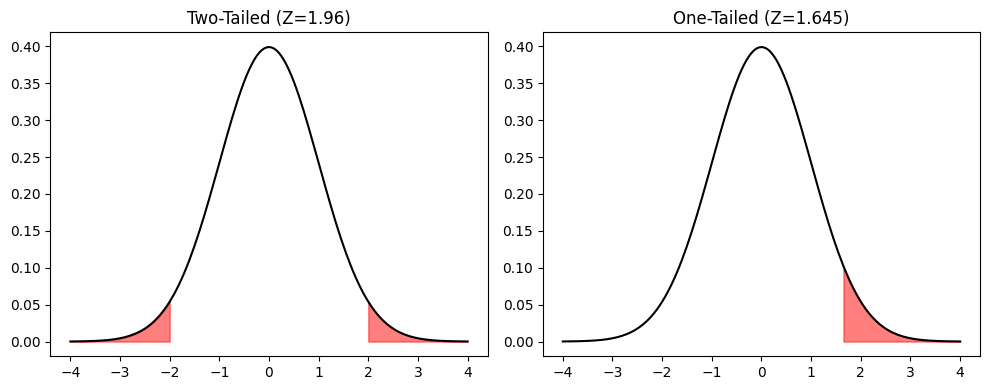

In [7]:
# Visualizing Tails (Simplified)
x_vals, y_vals = generate_normal_data(-4, 4, 0.05)

plt.figure(figsize=(10, 4))

# 1. Two-Tailed
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'k')
plt.title("Two-Tailed (Z=1.96)")
# Fill ends
plt.fill_between([x for x in x_vals if x > 1.96], [y for x, y in zip(x_vals, y_vals) if x > 1.96], color='red', alpha=0.5)
plt.fill_between([x for x in x_vals if x < -1.96], [y for x, y in zip(x_vals, y_vals) if x < -1.96], color='red', alpha=0.5)

# 2. One-Tailed
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, 'k')
plt.title("One-Tailed (Z=1.645)")
# Fill only right end
plt.fill_between([x for x in x_vals if x > 1.645], [y for x, y in zip(x_vals, y_vals) if x > 1.645], color='red', alpha=0.5)

plt.tight_layout()
plt.show()
